# Tutorial 2: My first matching.

# Objectives:
#### - Match the FODO cell of Tutorial 1 using the thin lens approximation.
#### - Thick and thin lens approximation optics comparison.
#### - Tune and beta-function dependence on K1.


# Python libraries 

In [ ]:
#########################################
# Python libraries                      #
#########################################
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# For symbolic computation (solving algebra problems)
import sympy as sp

#########################################
# Cpymad library                        #
#########################################
from cpymad.madx import Madx 

#### Considering the periodic solution of the equation of motion of a FODO cell and imposing the **thin lens approximation** and the stability condition one can get the following relations between optics parameters and magnets properties:

#### $\color{blue}{\text{Figure 1: Thin lens approximation FODO phase advance as a function of K, $L_{cell}$ and $L_q$}}$ 

In [4]:
# Relation between the phase advance of the cell and K, Lcell, Lq 
a, b, g, m, d, Lq, Lc, K, pi = sp.symbols(r'\alpha,\beta, \gamma,\mu, \Delta, L_{q}, L_{cell} K \pi')
sp.Eq(d*m/pi,2/pi*sp.asin(K*Lq*Lc/4))

Eq(\Delta*\mu/\pi, 2*asin(K*L_{cell}*L_{q}/4)/\pi)

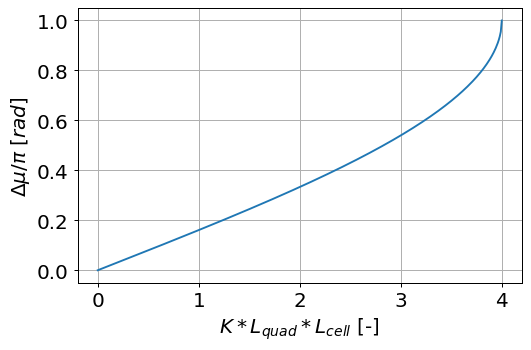

In [5]:
# Parametric plots
plt.rcParams['savefig.dpi'] = 90
plt.rcParams['figure.dpi'] = 90

x=np.arange(0,4.01,0.01)
y=2*np.arcsin(x/4)/np.pi
fig, ax1 = plt.subplots()
ax1.plot(x,y,'-')
ax1.set_ylabel("$\Delta \mu / \pi~[rad]$", fontsize=16)
ax1.set_xlabel("$K*L_{quad}*L_{cell}$ [-]", fontsize=16)
ax1.grid()
ax1.tick_params(axis='both', labelsize=16)
plt.tight_layout()  

#### $\color{blue}{\text{Figure 2: Thin lens approximation maximum and minimum FODO $\beta$-function as a function of K, $L_{cell}$ and $L_q$}}$ 

In [6]:
# Relation between the beta of the cell and K, Lcell, Lq
a, bmin, bmax, g, m, d, Lq, Lc, K, pi = sp.symbols(r'\alpha,\beta_{min}, \beta_{max}, \gamma,\mu, \Delta, L_{q}, L_{cell} K \pi')
sp.Eq(bmin/Lc,(1-(K*Lq*Lc/4))/(sp.sin(2*sp.asin(K*Lq*Lc/4))))

Eq(\beta_{min}/L_{cell}, (-K*L_{cell}*L_{q}/4 + 1)/sin(2*asin(K*L_{cell}*L_{q}/4)))

In [7]:
sp.Eq(bmax/Lc,(1+(K*Lq*Lc/4))/(sp.sin(2*sp.asin(K*Lq*Lc/4))))

Eq(\beta_{max}/L_{cell}, (K*L_{cell}*L_{q}/4 + 1)/sin(2*asin(K*L_{cell}*L_{q}/4)))

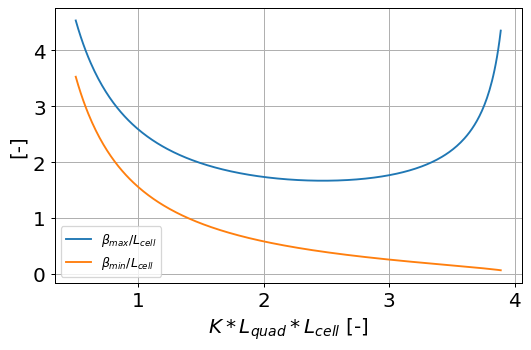

In [11]:
plt.rcParams['savefig.dpi'] = 90
plt.rcParams['figure.dpi'] = 90

x=np.arange(0.5,3.90,0.01)
betamax=(1+(x/4))/(np.sin(2*np.arcsin(x/4)))
betamin=(1-(x/4))/(np.sin(2*np.arcsin(x/4)))
fig, ax1 = plt.subplots()
ax1.plot(x,betamax,'-',label=r"$\beta_{max}/L_{cell}$")
ax1.plot(x,betamin,'-',label=r"$\beta_{min}/L_{cell}$")
ax1.set_ylabel("[-]", fontsize=16)
ax1.set_xlabel("$K*L_{quad}*L_{cell}$ [-]", fontsize=16)
plt.grid()
plt.legend()
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()  

# Questions

#### 1. Try to TWISS the FODO cell defined in Tutorial 1 powering the quadrupoles to obtain a ∆μ ~ 90° in the cell using the thin lens approximation (Figure 1).
     
#### 2. What is the $\beta_{max}$ compared with the thin lens approximation solution from Figure 2?

#### 3. Halve the focusing strength of the quadrupoles, what is the effect of it on the $\beta_{max}$ and $\beta_{min}$ and on the $\Delta \mu$? Compare with the thin lens approximation from Figure 1 and Figure 2.

#### 4. Compute the maximum beam size $\sigma$ assuming a normalized emittance of 3 mrad mm and $E_{tot}= 7 TeV$.

# Launching MAD-X

In [13]:
# madx = Madx(stdout=True)
madx = Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2022.12.06 10:50:22      +
  ++++++++++++++++++++++++++++++++++++++++++++


# Methods in the Madx class from cpymad library to be used:

#### To run the MAD-X lattice input file:

`madx.call('name_of_the_file.madx')`

#### To save the MAD-X output data from the TWISS and SUMM tables into a pandas dataframe: 

`madx.table.twiss.dframe()`

`madx.table.summ.dframe()`

#### To run a MAD-X command from the Jupyter-notebook: 

`madx.input("MAD-X command")`

# Python plot commands

#### You can copy/paste, uncomment and apply the example below for plotting:

In [12]:
###########################
#### Plot example code ####
###########################

#### To change the size of the plot window
# plt.rcParams['figure.dpi'] = 100

#### Plot command
# plt.plot(x,y,'ob',label='Example')

#### Adding labels
# plt.xlabel('s[m]')
# plt.ylabel('[m]')

#### Adding a legend
# plt.legend(loc='best')

# Questions

#### 1. Try to TWISS the FODO cell defined in Tutorial 1 powering the quadrupoles to obtain a ∆μ ~ 90° in the cell using the thin lens approximation (Figure 1).

#### 2. What is the $\beta_{max}$ compared with the thin lens approximation solution from Figure 2? 

#### 3. Halve the focusing strength of the quadrupoles, what is the effect of it on the $\beta_{max}$ and $\beta_{min}$ and on the $\Delta \mu$? Compare with the thin lens approximation from Figure 1 and Figure 2.

#### 4. Compute the maximum beam size $\sigma$ assuming a normalized emittance of 3 mrad mm and $E_{tot}= 7 TeV$.

#### One has to remember
#### \begin{equation} \sigma=\sqrt{\frac{\beta \epsilon_n}{ \gamma_r}} \end{equation} 